# Exercise 2

<img src="images/exercise-icon.png" style="float:left;width:40px;height:40px;">
The file `sazava.data` contains whole-rock major- and trace-element analyses for granitoid rocks from the Variscan Sázava suite of the Central Bohemian Plutonic Complex. 
<div style="text-align: right"> 
<img src="images/floppy.png" style="float:right;width:30px;height:30px;">
sazava.data </div>

* Read into matrix `WR` analyses stored in tab-delimited data text file `sazava.data`. 
* Display a table with three columns: SiO<sub>2</sub>, MgO and Na<sub>2</sub>O/K<sub>2</sub>O (using the function `cbind`; do not forget to label the columns correctly).
* Plot all the possible combinations of binary diagrams for the following major-element oxides: SiO<sub>2</sub>, MgO, FeO, Fe<sub>2</sub>O<sub>3</sub>, CaO, P<sub>2</sub>O<sub>5</sub> 
* Build a binary plot SiO<sub>2</sub>–CaO, choose suitable ranges for the x and y axes, label them and annotate plotted data points by sample names. Plot two versions, in one all the data points as dark blue squares, in the second assign the plotting symbols according to individual rock types (utilizing the data in the column `WR[,”Symbol”]`). Plot the line SiO<sub>2</sub>/CaO = 10 passing through the origin.
* Display boxplot denoting distribution of strontium, and find out all the main statistical parameters characterizing its distribution (the range, median, number of observations and not determined cases, …). Plot the Sr data also as a frequency histogram.
* Create a new matrix x, containing only samples, whose SiO<sub>2</sub> > 55 
* Plot diagram SiO<sub>2</sub>–CaO for these samples (set double size of the plotting symbols) and fit the data points by a straight line using the least squares linear regression.

*NB* Setting the final size of the graphical window to 5 by 5 in Jupyter notebook for aesthetics sake:

`options(repr.plot.width=5, repr.plot.height=5)`

### 1)

In [123]:
WR  <-  read.table("data/sazava.data",sep="\t")
options(repr.plot.width=9, repr.plot.height=9)

### 2)

In [124]:
i <- cbind(WR['SiO2'] , WR['MgO'] , WR['Na2O']/WR['K2O'])
colnames(i) <- c('SiO2' , 'MgO' , 'Na2O/K2O')
i

,SiO2,MgO,Na2O/K2O
,<dbl>,<dbl>,<dbl>
Sa-1,59.98,3.21,1.008000
Sa-2,55.17,3.67,1.976471
Sa-3,55.09,3.52,1.387255
Sa-4,50.72,5.18,1.768750
Sa-7,57.73,2.82,1.520958
SaD-1,52.90,3.89,1.903448
Gbs-1,49.63,8.59,1.560748
Gbs-20,51.72,7.47,1.427536
Gbs-2,48.84,5.11,2.144578


### 3)

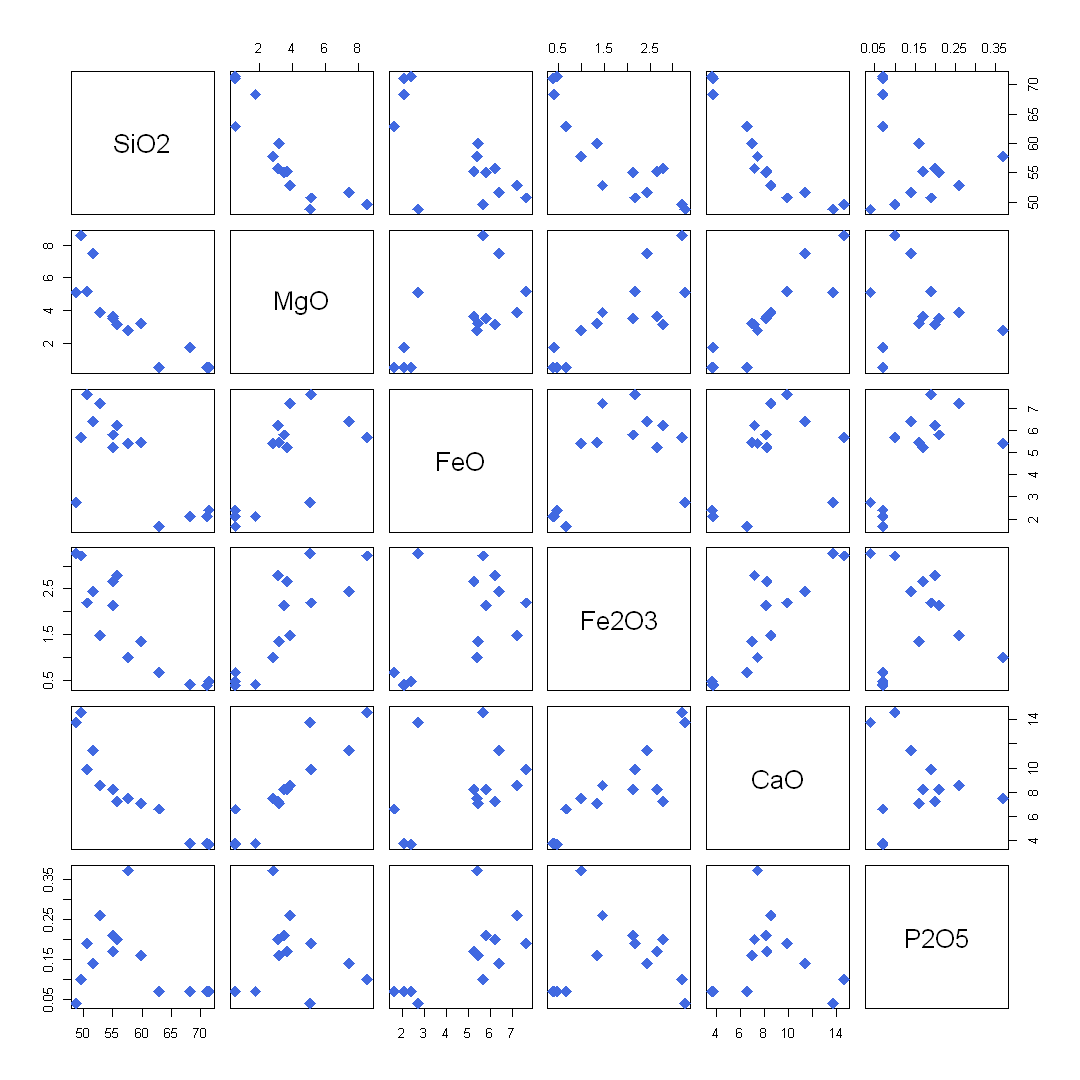

In [125]:
oxides <- c('SiO2', 'MgO' , 'FeO' , 'Fe2O3' , 'CaO' , 'P2O5')
pairs(WR[,oxides],pch=18,col="royalblue",cex=2)

### 4)

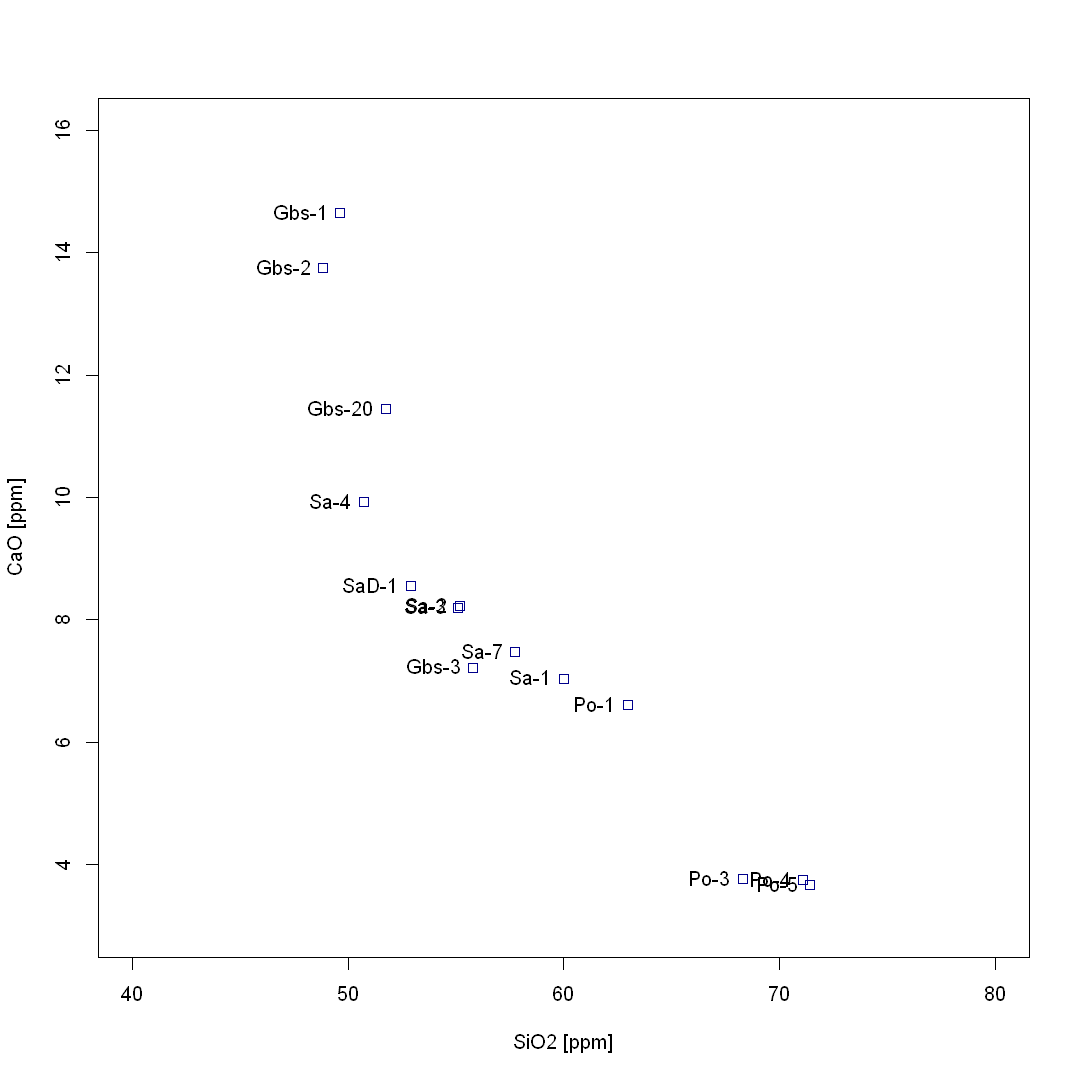

In [126]:
plot(WR[,"SiO2"],WR[,"CaO"], xlim=c(40,80), ylim=c(3,16), ylab='CaO [ppm]' , xlab="SiO2 [ppm]" , pch=0 , col='dark blue')
text(WR[,"SiO2"],WR[,"CaO"],rownames(WR),pos=2,col="black")

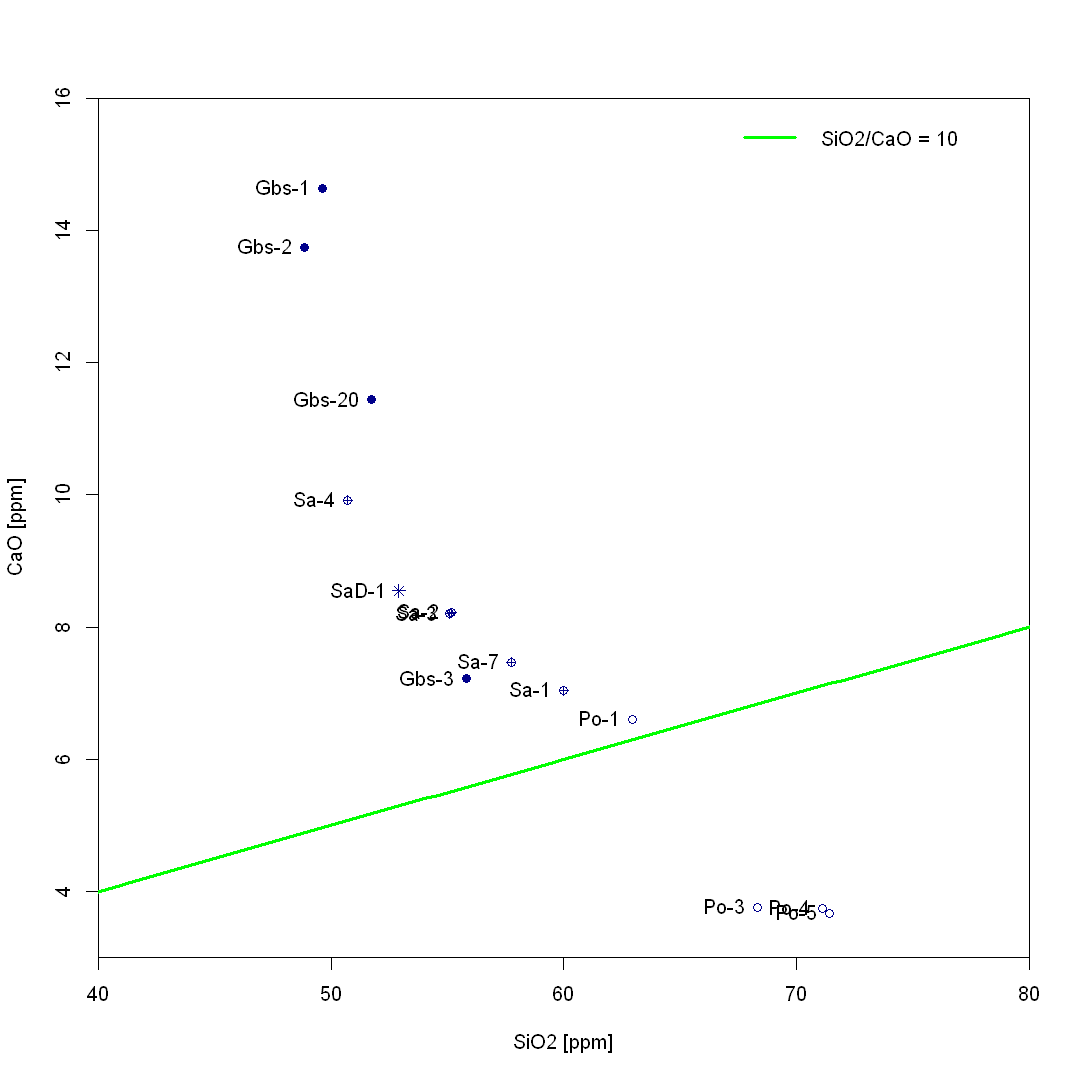

In [127]:
plot(WR[,"SiO2"],WR[,"CaO"], xlim=c(40,80) , ylim=c(3,16), ylab='CaO [ppm]' , xlab="SiO2 [ppm]" , pch=WR[,"Symbol"], col='dark blue',xaxs="i",yaxs="i")
text(WR[,"SiO2"],WR[,"CaO"],rownames(WR),pos=2,col="black")
curve(0.1*x,add=TRUE,col="green",lwd=3,lty="solid",from=30,to=90)
legend(x="topright",legend="SiO2/CaO = 10",col="green",lwd=3,lty="solid",bty="n")

### 5)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  278.0   392.5   430.0   443.0   537.5   599.0       2 

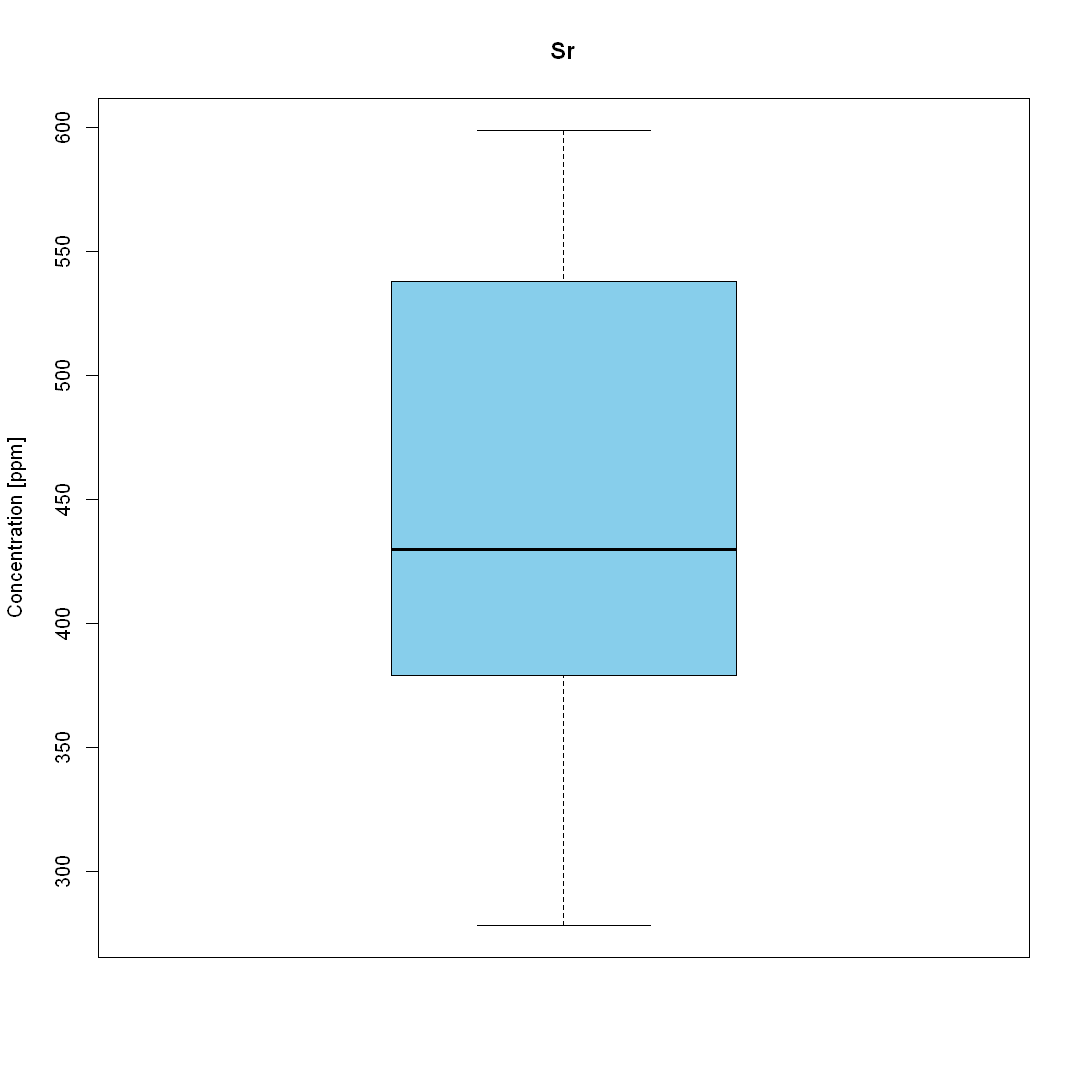

In [128]:
ui <- boxplot(WR[,'Sr'],col="skyblue",ylab='Concentration [ppm]',main="Sr")
summary(WR[,'Sr'])

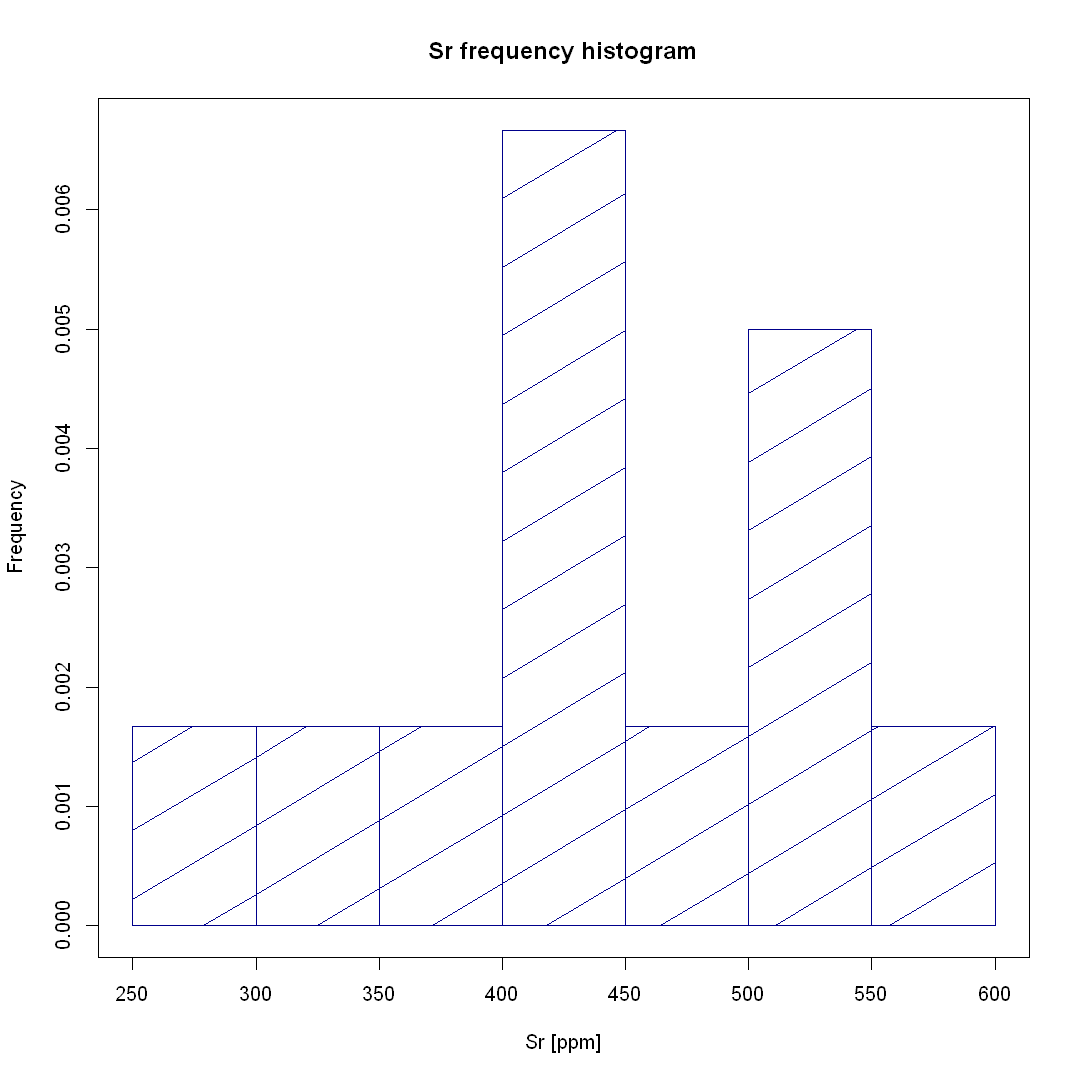

In [129]:
hist(WR[,"Sr"],xlab="Sr [ppm]",ylab="Frequency",freq=FALSE,col="darkblue",density=3,angle=30,main="Sr frequency histogram")
box()

### 6)

In [130]:
x <- subset(WR , WR['SiO2']>55)

### 7)

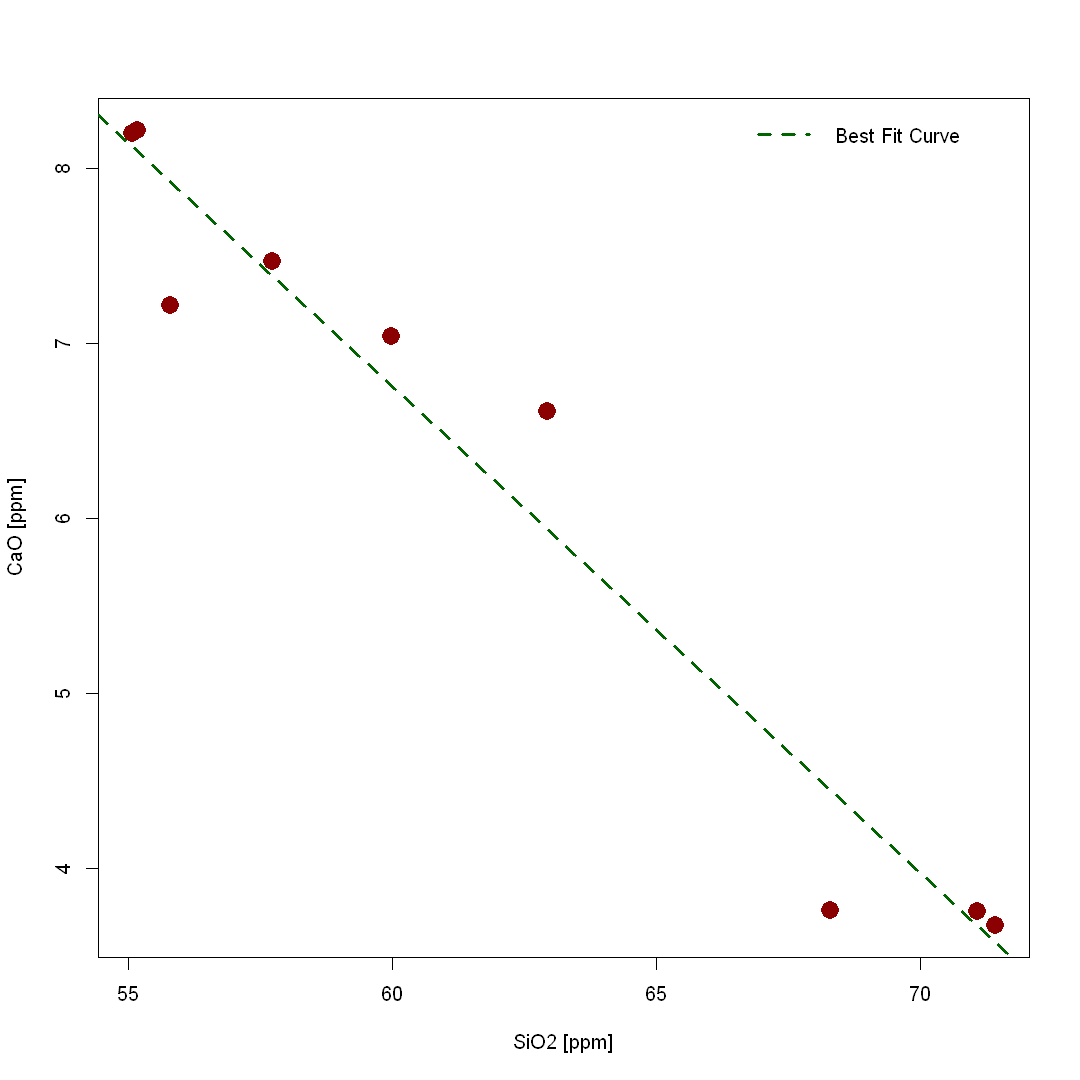

In [134]:
plot(x[,'SiO2'], x[,'CaO'], xlab='SiO2 [ppm]', ylab='CaO [ppm]' , pch=16, col='darkred' , cex=2)
aa <- lm(x[,"CaO"]~x[,"SiO2"])
abline(aa,lwd=3,lty="dashed",col="darkgreen")
legend(x="topright",legend="Best Fit Curve",lwd=3,lty="dashed",col="darkgreen",bty="n")